In [1]:
import pandas as pd

# Define the working directory and file paths
wd = "/g/data/lf10/as7425/R2DTool_demo/"
file1 = f"{wd}/methylation_calls_annotated.bed"
file2 = f"{wd}/methylation_calls_annotated_R.bed"

# Read the files into Pandas dataframes
df1 = pd.read_csv(file1, sep='\t', low_memory=False)
df2 = pd.read_csv(file2, sep='\t', low_memory=False)

# Assuming you want to match 'transcript' in df1 with 'transcript_id' in df2
df2.rename(columns={'transcript_id': 'transcript'}, inplace=True)


In [2]:
df1['transcript'] = df1['transcript'].str.split('.').str[0]
print(df1.head())

        transcript  start   end name score strand      motif  coverage  \
0  ENST00000000233   1007  1008    .     .      +  CTTGAGTAA       648   
1  ENST00000000233   1011  1012    .     .      +  AGTAATAAA       628   
2  ENST00000000233    137   138    .     .      +  AAGCAGATG       467   
3  ENST00000000233    151   152    .     .      +  TCTCATGGT       608   
4  ENST00000000233    164   165    .     .      +  TTGGATGCG       544   

         stoichiometry  probability  ... transcript_biotype tx_len cds_start  \
0   0.1013215859030837     0.118574  ...     protein_coding   1032      88.0   
1   0.3223684210526316     0.547572  ...     protein_coding   1032      88.0   
2   0.2560240963855422     0.363126  ...     protein_coding   1032      88.0   
3   0.5113636363636364     0.421296  ...     protein_coding   1032      88.0   
4  0.17433414043583534     0.367664  ...     protein_coding   1032      88.0   

   cds_end  tx_end  transcript_metacoordinate  abs_cds_start  abs_cds_end 

In [3]:
df2.head()

,transcript,start,end,name,score,strand,motif,coverage,stoichiometry,probability,...,utr5_len,utr3_len,cds_start,cds_end,tx_end,transcript_metacoordinate,abs_cds_start,abs_cds_end,up_junc_dist,down_junc_dist
0,ENST00000000233,1007,1008,.,.,+,CTTGAGTAA,648,0.1013215859030837,0.118574,...,88,401,88,631,1032,2.937656,919,376,463.0,NaN
1,ENST00000000233,1011,1012,.,.,+,AGTAATAAA,628,0.3223684210526316,0.547572,...,88,401,88,631,1032,2.947631,923,380,467.0,NaN
2,ENST00000000233,137,138,.,.,+,AAGCAGATG,467,0.2560240963855422,0.363126,...,88,401,88,631,1032,1.090239,49,-494,NaN,18.0
3,ENST00000000233,151,152,.,.,+,TCTCATGGT,608,0.5113636363636364,0.421296,...,88,401,88,631,1032,1.116022,63,-480,NaN,4.0
4,ENST00000000233,164,165,.,.,+,TTGGATGCG,544,0.17433414043583534,0.367664,...,88,401,88,631,1032,1.139963,76,-467,9.0,72.0


In [4]:

# Merge the dataframes on 'transcript' and 'start' columns
merged_df = pd.merge(df1, df2, on=['transcript', 'start'], suffixes=('_rust', '_R'))

# Output the merged dataframe if needed (can also save to file if required)
print(merged_df.head())

# Optionally, save the merged dataframe to a file
# merged_df.to_csv(f"{wd}/merged_output.bed", sep='\t', index=False)


        transcript  start  end_rust name_rust score_rust strand_rust  \
0  ENST00000000233   1007      1008         .          .           +   
1  ENST00000000233   1011      1012         .          .           +   
2  ENST00000000233    137       138         .          .           +   
3  ENST00000000233    151       152         .          .           +   
4  ENST00000000233    164       165         .          .           +   

  motif_rust  coverage_rust   stoichiometry_rust  probability_rust  ...  \
0  CTTGAGTAA            648   0.1013215859030837          0.118574  ...   
1  AGTAATAAA            628   0.3223684210526316          0.547572  ...   
2  AAGCAGATG            467   0.2560240963855422          0.363126  ...   
3  TCTCATGGT            608   0.5113636363636364          0.421296  ...   
4  TTGGATGCG            544  0.17433414043583534          0.367664  ...   

  utr5_len utr3_len cds_start_R  cds_end_R  tx_end_R  \
0       88      401          88        631      1032   
1   

In [5]:
print(merged_df.columns)

Index(['transcript', 'start', 'end_rust', 'name_rust', 'score_rust',
       'strand_rust', 'motif_rust', 'coverage_rust', 'stoichiometry_rust',
       'probability_rust', 'gene_id_rust', 'gene_name_rust',
       'transcript_biotype_rust', 'tx_len_rust', 'cds_start_rust',
       'cds_end_rust', 'tx_end_rust', 'transcript_metacoordinate_rust',
       'abs_cds_start_rust', 'abs_cds_end_rust', 'up_junc_dist_rust',
       'down_junc_dist_rust', 'end_R', 'name_R', 'score_R', 'strand_R',
       'motif_R', 'coverage_R', 'stoichiometry_R', 'probability_R',
       'transcript_biotype_R', 'gene_name_R', 'gene_id_R', 'tx_len_R',
       'cds_len', 'utr5_len', 'utr3_len', 'cds_start_R', 'cds_end_R',
       'tx_end_R', 'transcript_metacoordinate_R', 'abs_cds_start_R',
       'abs_cds_end_R', 'up_junc_dist_R', 'down_junc_dist_R'],
      dtype='object')


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Function to plot scatterplot with trendline and R^2 value
def plot_scatter_with_trendline(df, x_col, y_col, log_scale=False):
    """
    Plots a scatterplot with a trendline and R^2 value for two columns in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    x_col (str): The name of the column to use as the x-axis.
    y_col (str): The name of the column to use as the y-axis.
    log_scale (bool): Whether to apply log-log scaling to both axes.
    """
    print(df.columns)
    # Check if columns exist in the DataFrame
    if x_col not in df.columns or y_col not in df.columns:
        raise ValueError("One or both columns not found in the DataFrame.")
    
    # Creating a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6)

    # Optionally apply log-log scaling
    if log_scale:
        plt.xscale('log')
        plt.yscale('log')

    # Fit a linear regression model to get the trendline and R^2 value
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col].dropna(), df[y_col].dropna())
    plt.plot(df[x_col], intercept + slope*df[x_col], color='red', label=f'Fit Line: y={slope:.2f}x+{intercept:.2f}')

    # Plot settings
    plt.title(f'Scatter Plot with Trendline between {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title=f'R-squared = {r_value**2:.2f}')

    # Show plot
    plt.show()



Index(['transcript', 'start', 'end_rust', 'name_rust', 'score_rust',
       'strand_rust', 'motif_rust', 'coverage_rust', 'stoichiometry_rust',
       'probability_rust', 'gene_id_rust', 'gene_name_rust',
       'transcript_biotype_rust', 'tx_len_rust', 'cds_start_rust',
       'cds_end_rust', 'tx_end_rust', 'transcript_metacoordinate_rust',
       'abs_cds_start_rust', 'abs_cds_end_rust', 'up_junc_dist_rust',
       'down_junc_dist_rust', 'end_R', 'name_R', 'score_R', 'strand_R',
       'motif_R', 'coverage_R', 'stoichiometry_R', 'probability_R',
       'transcript_biotype_R', 'gene_name_R', 'gene_id_R', 'tx_len_R',
       'cds_len', 'utr5_len', 'utr3_len', 'cds_start_R', 'cds_end_R',
       'tx_end_R', 'transcript_metacoordinate_R', 'abs_cds_start_R',
       'abs_cds_end_R', 'up_junc_dist_R', 'down_junc_dist_R'],
      dtype='object')


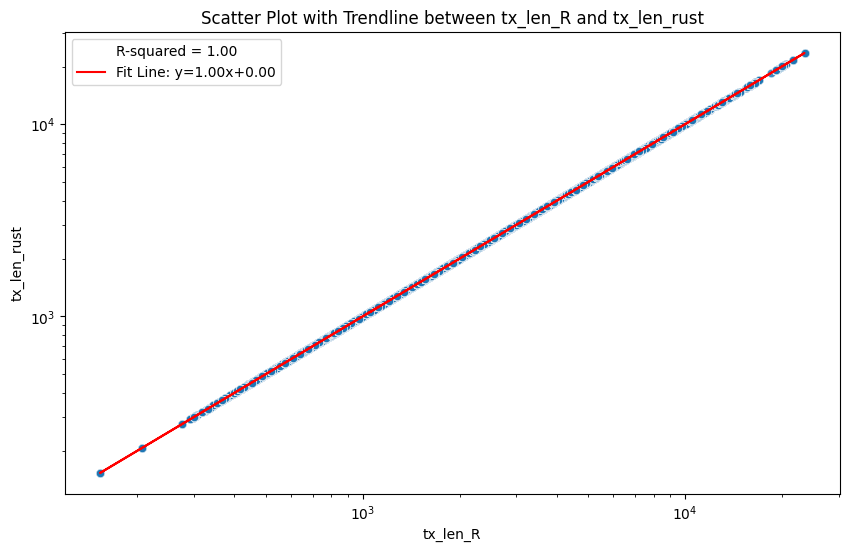

In [7]:

# Call the function with column names
plot_scatter_with_trendline(merged_df, 'tx_len_R', 'tx_len_rust', log_scale=True)
# Uncomment the following line to apply log-log scaling:
# plot_scatter_with_trendline(merged_df, 'Column1', 'Column2', log_scale=True)


In [8]:
import pandas as pd

def find_rows_with_nan(df, col1, col2):
    """
    Identifies rows with NaN values in either of the two specified columns.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    col1 (str): The name of the first column to check for NaN values.
    col2 (str): The name of the second column to check for NaN values.
    
    Returns:
    DataFrame: A DataFrame containing only the rows where at least one of the specified columns has a NaN value.
    """
    # Use `isna()` to find NaNs and `any(axis=1)` to filter rows where any of the specified columns have NaN
    nan_rows = df[df[[col1, col2]].isna().any(axis=1)]
    return nan_rows

# Sample usage:
# Define your DataFrame 'merged_df' here
# For example:
# merged_df = pd.DataFrame({
#     'tx_len_R': [1.5, np.nan, 3.0, 4.5, np.nan],
#     'tx_len_rust': [2.5, 3.5, np.nan, 4.5, 5.5]
# })

# Find and print rows with NaN in either 'tx_len_R' or 'tx_len_rust'
nan_rows = find_rows_with_nan(merged_df, 'tx_len_R', 'tx_len_rust')
print(nan_rows)


Empty DataFrame
Columns: [transcript, start, end_rust, name_rust, score_rust, strand_rust, motif_rust, coverage_rust, stoichiometry_rust, probability_rust, gene_id_rust, gene_name_rust, transcript_biotype_rust, tx_len_rust, cds_start_rust, cds_end_rust, tx_end_rust, transcript_metacoordinate_rust, abs_cds_start_rust, abs_cds_end_rust, up_junc_dist_rust, down_junc_dist_rust, end_R, name_R, score_R, strand_R, motif_R, coverage_R, stoichiometry_R, probability_R, transcript_biotype_R, gene_name_R, gene_id_R, tx_len_R, cds_len, utr5_len, utr3_len, cds_start_R, cds_end_R, tx_end_R, transcript_metacoordinate_R, abs_cds_start_R, abs_cds_end_R, up_junc_dist_R, down_junc_dist_R]
Index: []

[0 rows x 45 columns]


In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)
# Assuming merged_df is already loaded into your environment
# Example of checking if the DataFrame has these columns, in case they might be missing:
if 'tx_len_R' in merged_df.columns and 'tx_len_rust' in merged_df.columns:
    # Create a filter for rows where the two columns are not equal
    diff_filter = merged_df['tx_len_R'] != merged_df['tx_len_rust']
    
    # Extract the rows where the values differ
    different_rows = merged_df[diff_filter]
    
    # Calculate the percentage of rows that are different
    percentage_different = (len(different_rows) / len(merged_df)) * 100

    # Print the rows with differences
    print("Rows where 'tx_len_R' differs from 'tx_len_rust':")
    print(different_rows)
    
    # Print the percentage of rows that are different
    print(f"Percentage of rows affected: {percentage_different:.2f}%")
else:
    print("One or both columns are missing in the DataFrame.")


Rows where 'tx_len_R' differs from 'tx_len_rust':
Empty DataFrame
Columns: [transcript, start, end_rust, name_rust, score_rust, strand_rust, motif_rust, coverage_rust, stoichiometry_rust, probability_rust, gene_id_rust, gene_name_rust, transcript_biotype_rust, tx_len_rust, cds_start_rust, cds_end_rust, tx_end_rust, transcript_metacoordinate_rust, abs_cds_start_rust, abs_cds_end_rust, up_junc_dist_rust, down_junc_dist_rust, end_R, name_R, score_R, strand_R, motif_R, coverage_R, stoichiometry_R, probability_R, transcript_biotype_R, gene_name_R, gene_id_R, tx_len_R, cds_len, utr5_len, utr3_len, cds_start_R, cds_end_R, tx_end_R, transcript_metacoordinate_R, abs_cds_start_R, abs_cds_end_R, up_junc_dist_R, down_junc_dist_R]
Index: []
Percentage of rows affected: 0.00%


Index(['transcript', 'start', 'end_rust', 'name_rust', 'score_rust',
       'strand_rust', 'motif_rust', 'coverage_rust', 'stoichiometry_rust',
       'probability_rust', 'gene_id_rust', 'gene_name_rust',
       'transcript_biotype_rust', 'tx_len_rust', 'cds_start_rust',
       'cds_end_rust', 'tx_end_rust', 'transcript_metacoordinate_rust',
       'abs_cds_start_rust', 'abs_cds_end_rust', 'up_junc_dist_rust',
       'down_junc_dist_rust', 'end_R', 'name_R', 'score_R', 'strand_R',
       'motif_R', 'coverage_R', 'stoichiometry_R', 'probability_R',
       'transcript_biotype_R', 'gene_name_R', 'gene_id_R', 'tx_len_R',
       'cds_len', 'utr5_len', 'utr3_len', 'cds_start_R', 'cds_end_R',
       'tx_end_R', 'transcript_metacoordinate_R', 'abs_cds_start_R',
       'abs_cds_end_R', 'up_junc_dist_R', 'down_junc_dist_R'],
      dtype='object')


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3008336 and the array at index 1 has size 3151872

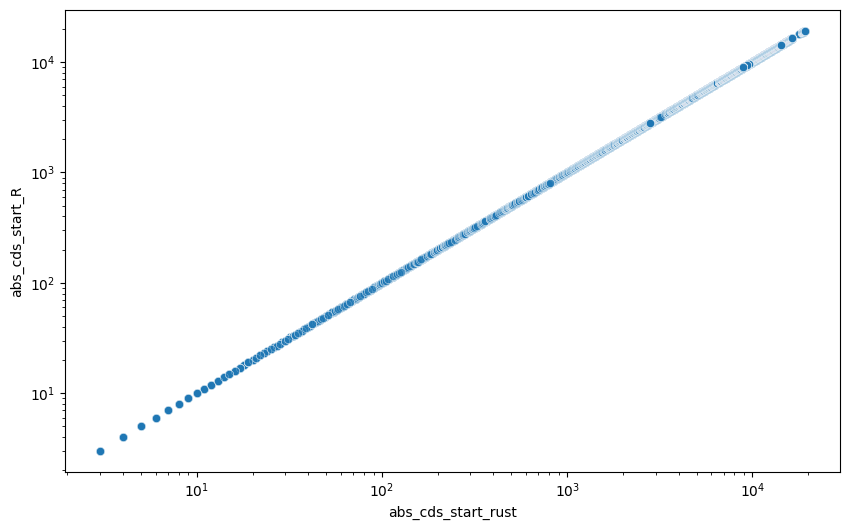

In [10]:
# Call the function with column names
plot_scatter_with_trendline(merged_df, 'abs_cds_start_rust', 'abs_cds_start_R', log_scale=True)

In [ ]:
# Call the function with column names
plot_scatter_with_trendline(merged_df, 'transcript_metacoordinate_rust', 'transcript_metacoordinate_R', log_scale=True)

### Call the function with column names
plot_scatter_with_trendline(merged_df, 'up_junc_dist_rust', 'up_junc_dist_R', log_scale=True)

In [ ]:
# Call the function with column names
plot_scatter_with_trendline(merged_df, 'up_junc_dist_rust', 'up_junc_dist_R', log_scale=True)

In [ ]:
# Call the function with column names
plot_scatter_with_trendline(merged_df, 'down_junc_dist_rust', 'down_junc_dist_R', log_scale=True)